In [4]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 1. Cargar datos
df = pd.read_csv("Mall_Customers.csv")
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
# 2. Explorar datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# 3. Preprocesamiento
# Codificar género
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Escalar variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
# 4. Selección de características (ya seleccionamos Annual Income y Spending Score)

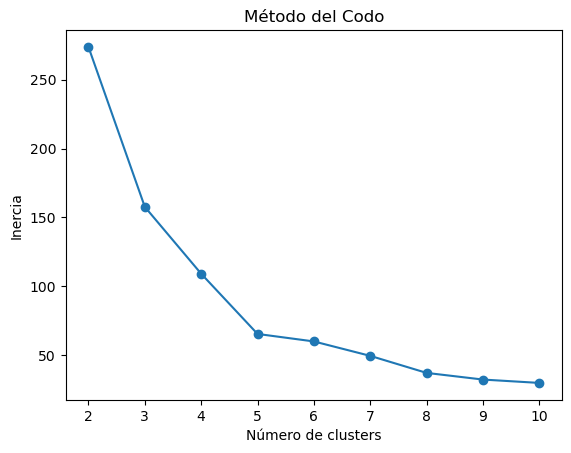

In [12]:
# 5. K-means clustering
# Método del Codo
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

In [14]:
# Entrenar modelo con el mejor k
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)

In [16]:
# 5. Evaluación del modelo
silhouette = silhouette_score(df_scaled, labels)
calinski = calinski_harabasz_score(df_scaled, labels)
davies = davies_bouldin_score(df_scaled, labels)
print(f"Coeficiente de Silhouette: {silhouette}")
print(f"Índice de Calinski-Harabasz: {calinski}")
print(f"Indice Davies Bouldin: {davies}")

Coeficiente de Silhouette: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357
Indice Davies Bouldin: 0.5722356162263352
